In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

In [37]:
df=pd.read_csv('data.csv')

In [38]:
df.head(10)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN
5,S103,Cohort2,BPTB,53,M,1,NaN,NaN,NaN,0.84825,0.003393,62.12600,59.793000,NaN
6,S104,Cohort2,BPTB,70,M,1,NaN,NaN,NaN,0.62205,0.174381,152.27700,117.516000,NaN
7,S105,Cohort2,BPTB,58,F,1,NaN,NaN,11.0,0.89349,0.003574,3.73000,40.294000,NaN
8,S106,Cohort2,BPTB,59,F,1,NaN,NaN,NaN,0.48633,0.001945,7.02100,26.782000,NaN
9,S107,Cohort2,BPTB,56,F,1,NaN,NaN,24.0,0.61074,0.278778,83.92800,19.185000,NaN


In [39]:
df.tail(10)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
1760,S522,Cohort1,BPTB,46,M,3,IV,NaN,NaN,0.75777,10.578610,206.526460,3203.940000,7879.0
1761,S529,Cohort1,BPTB,61,F,3,IV,NaN,13740.0,0.32799,5.232527,123.104730,755.820867,2331.5
1762,S535,Cohort2,BPTB,58,F,3,IV,NaN,NaN,2.39772,0.289500,6.824000,799.256000,NaN
1763,S539,Cohort2,BPTB,84,M,3,IV,NaN,NaN,0.66729,5.764349,950.080000,1945.172000,NaN
1764,S548,Cohort2,BPTB,66,M,3,IV,NaN,NaN,0.93873,7.085637,815.136000,2367.590000,NaN
1765,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
1766,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
1767,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
1768,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN
1769,S590,Cohort1,BPTB,74,M,3,IV,NaN,1488.0,1.50423,8.200958,411.938275,2021.321078,13200.0


In [40]:
df.shape

(1770, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                1770 non-null   object 
 1   patient_cohort           1770 non-null   object 
 2   sample_origin            1770 non-null   object 
 3   age                      1770 non-null   int64  
 4   sex                      1770 non-null   object 
 5   diagnosis                1770 non-null   int64  
 6   stage                    597 non-null    object 
 7   benign_sample_diagnosis  624 non-null    object 
 8   plasma_CA19_9            1050 non-null   float64
 9   creatinine               1770 non-null   float64
 10  LYVE1                    1770 non-null   float64
 11  REG1B                    1770 non-null   float64
 12  TFF1                     1770 non-null   float64
 13  REG1A                    918 non-null    float64
dtypes: float64(6), int64(2),

In [42]:
df.isna().sum()

,0
sample_id,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
stage,1173
benign_sample_diagnosis,1146
plasma_CA19_9,720
creatinine,0


In [43]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']

In [44]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

stage has 66.2712 % missing values
benign_sample_diagnosis has 64.7458 % missing values
plasma_CA19_9 has 40.678 % missing values
REG1A has 48.1356 % missing values


In [45]:
del(df['stage'])
del(df['benign_sample_diagnosis'])
del(df['sample_id'])

In [46]:
df['plasma_CA19_9'].fillna(int(df['plasma_CA19_9'].mean()), inplace=True)
df['REG1A'].fillna(int(df['REG1A'].mean()), inplace=True)

In [47]:
df.isna().sum()

,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
plasma_CA19_9,0
creatinine,0
LYVE1,0
REG1B,0
TFF1,0


In [48]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

[]

In [49]:
df['diagnosis'].unique()

array([1, 2, 3])

In [50]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [51]:
df['sex'].value_counts()

,count
sex,
F,897
M,873


In [52]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

In [53]:
df['sex'].value_counts()

,count
sex,
0,897
1,873


In [54]:
df['patient_cohort'] = df['patient_cohort'].map({'Cohort1': 1, 'Cohort2': 0})
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'], errors='coerce')

In [55]:
df['patient_cohort'].value_counts()

,count
patient_cohort,
1,996
0,774


In [56]:
df['sample_origin'] = df['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
df['sample_origin'] = pd.to_numeric(df['sample_origin'], errors='coerce')

In [57]:
df["sample_origin"].value_counts()

,count
sample_origin,
0,1227
1,396
2,87
3,60


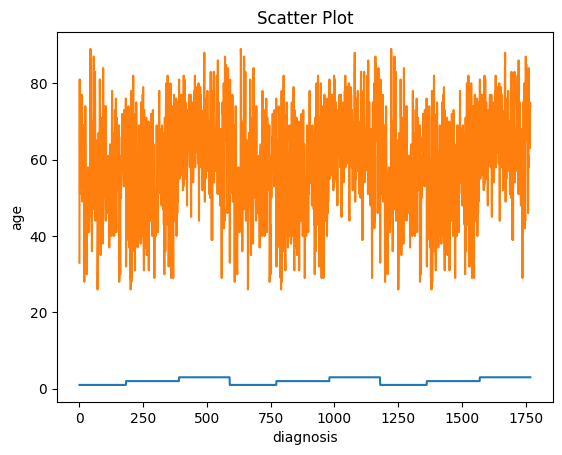

In [58]:
plt.plot(df['diagnosis'])
plt.plot(df['age'])

plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('diagnosis')
plt.ylabel('age')

plt.show()

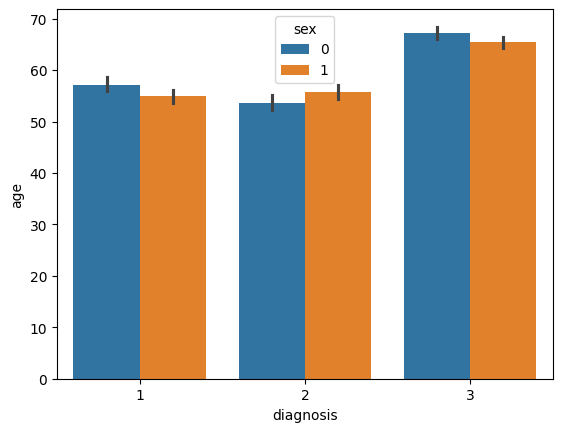

In [59]:
sns.barplot(x='diagnosis',y='age', data=df,
            hue='sex')

plt.show()

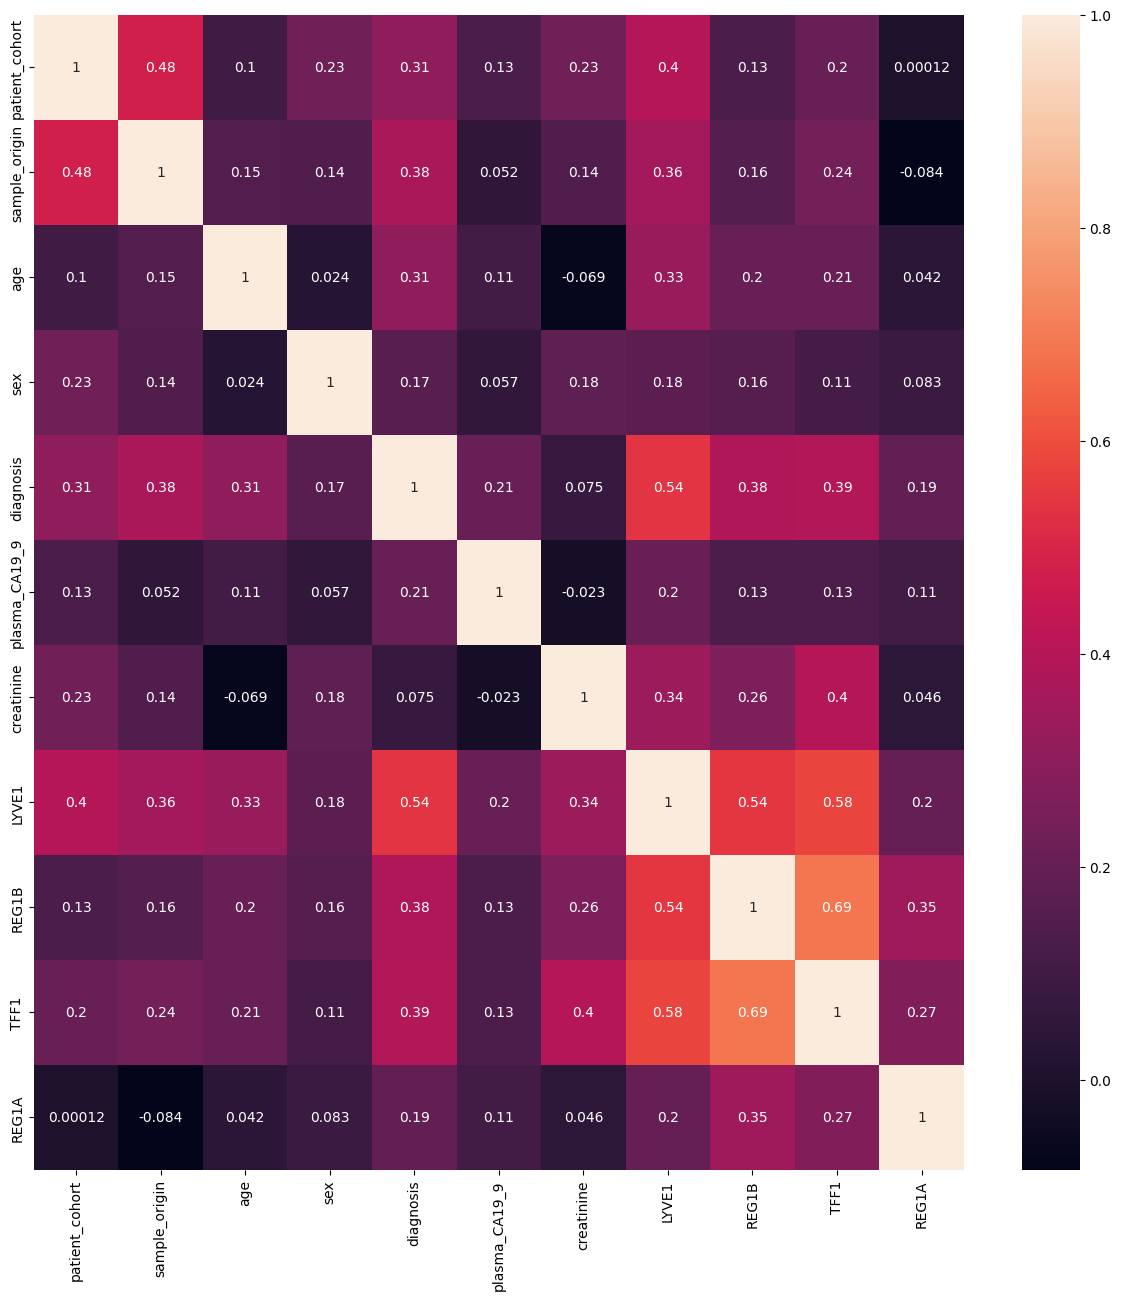

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,1,0,33,0,1,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,1,0,81,0,1,654.0,0.97266,2.037585,94.467030,209.488250,228.407
2,0,0,51,1,1,7.0,0.78039,0.145589,102.366000,461.141000,735.000
3,0,0,61,1,1,8.0,0.70122,0.002805,60.579000,142.950000,735.000
4,0,0,62,1,1,9.0,0.21489,0.000860,65.540000,41.088000,735.000
...,...,...,...,...,...,...,...,...,...,...,...
1765,0,0,68,1,3,654.0,0.52026,7.058209,156.241000,525.178000,735.000
1766,0,0,71,0,3,654.0,0.85956,8.341207,16.915000,245.947000,735.000
1767,0,0,63,1,3,654.0,1.36851,7.674707,289.701000,537.286000,735.000
1768,0,0,75,0,3,654.0,1.33458,8.206777,205.930000,722.523000,735.000


In [62]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [63]:
X.columns

Index(['patient_cohort', 'sample_origin', 'age', 'sex', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


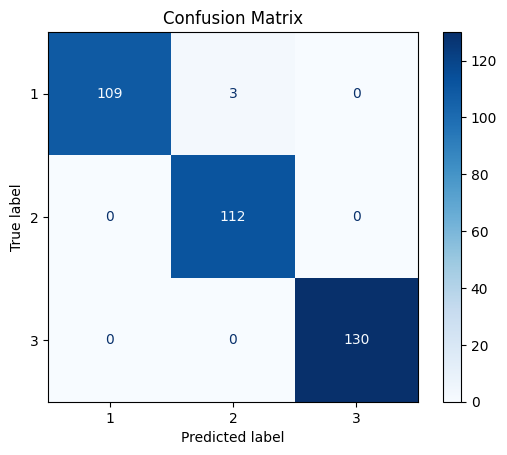

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.97
F1 Score: 0.97
Recall: 0.97
Precision: 0.97


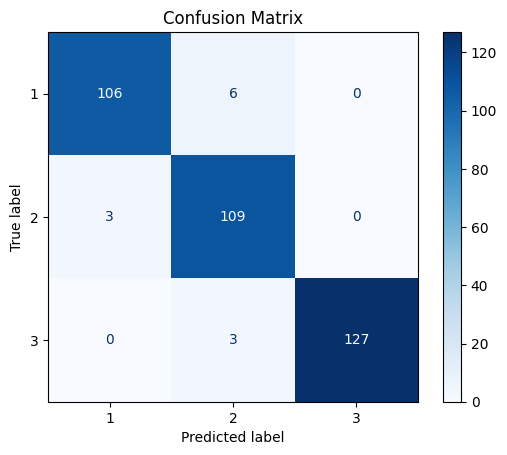

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.57
F1 Score: 0.57
Recall: 0.57
Precision: 0.58


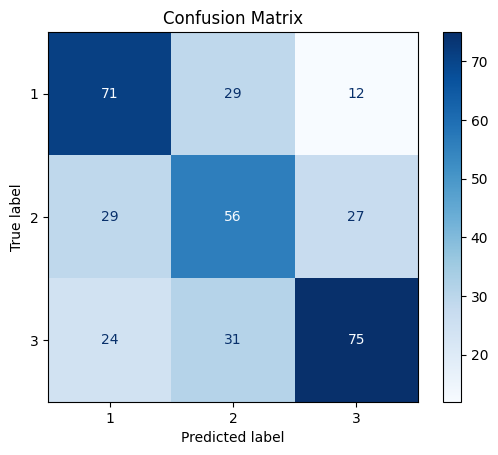

In [67]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Perceptron
perceptron = Perceptron(random_state=42, max_iter=1000)
perceptron.fit(X_train, y_train)

# Predict the test set
y_pred = perceptron.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=perceptron.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


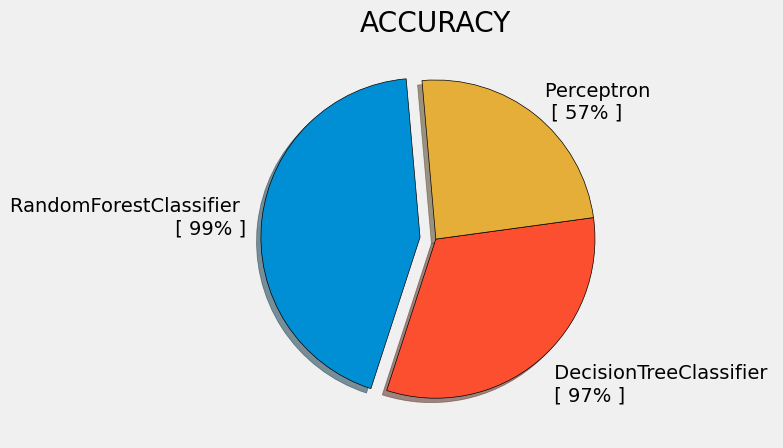

In [70]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [99, 73, 55]
labels = ['RandomForestClassifier \n [ 99% ]', '\n DecisionTreeClassifier \n [ 97% ]', 'Perceptron \n [ 57% ]']
explode = [0.1,0, 0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})

#wedgeprops is to put a boundary where the two colors meet.
#more on the matplotlib wedge documentation for more customisations.

plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [71]:
result=rf.predict(np.array([[0,0,68,1,654.0,0.52026,7.058209,156.241000,525.178000,735.000]]))

In [72]:
result[0].round()

3

In [73]:
result=rf.predict(np.array([[1,0,81,0,654.0,0.97266,2.037585,94.467030,209.488250,228.407]]))

In [74]:
result[0].round()

1

In [77]:
import pickle
# Dump the trained rf classifier with Pickle
rf_filename = 'rf.pkl'
# Open the file to save as pkl file
rf_Model_pkl = open(rf_filename, 'wb')
pickle.dump(rf, rf_Model_pkl)
# Close the pickle instances
rf_Model_pkl.close()